In [1]:
import glob
import os
import subprocess
import pathlib
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 50000
import numpy as np
import csv
import math

import matplotlib.pyplot as plt
#%matplotlib inline
#pathlib.Path(__file__).parent.absolute()

import seaborn as sns
sns.set_style('darkgrid')


In [2]:
    os.chdir("C:\\Users\\uprak\\jupyter_python\\work\\Alert Insurance\\Alert Insurance")
    print(os.getcwd())
    df_ins0=pd.read_csv("AlertIns-Consolidated-Raw-Data.csv")
    print(df_ins0.shape)
    #print(df_ins0.head(10))
    print(df_ins0.isnull().sum(),(df_ins0.isnull().sum()/df_ins0.shape[0])*100)
    print(df_ins0['BUSINESS_TYPE'].value_counts())


C:\Users\uprak\jupyter_python\work\Alert Insurance\Alert Insurance


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,15,16,20,25,26,33,42,44,45,50,52,55,57,59,60,61,63,65,66,67,68,69,71,72) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(202682, 73)
INTERMEDIARY_TYPE                     0
INTERMEDIARY_CATEGORY                 0
IRDA_LICENCE_NUMBER                   0
INTERMEDIARY_ID                       0
INTERMEDIARY_NAME                     0
LOCATION_NAME                         0
CUSTOMER_ID                      127784
CUSTOMER_NAME                         0
IRDA_PRODUCT_CODE                     0
PRODUCT_NAME                          0
POLICY_NUMBER                         0
Name                              96592
POL_NUM_TXT                           0
POL_PRIMARY_VERTICAL                  0
POL_PRI_SUB_VERTICAL                  2
POL_SECONDARY_VERTICAL           193049
POL_SEC_SUB_VERTICAL             193057
POL_DEAL_NUM                         75
POL_RM_CODE                          25
POL_RM_NAME                          25
POL_SEC_RM_NAME                  202529
APPLICABLE_PREMIUM_AMOUNT         50639
PREMIUM_FOR_PAYOUTS                   0
COMMISSION_PAYOUTS_PERCENTAGE         0
ACTUAL_COMMISSION_AMOUNT   

In [3]:
    x = (df_ins0.isnull().sum()/df_ins0.shape[0])*100
    Null_cols = []
    for i, row in x.items():
        if row > 40.000000:
            Null_cols.append(i)

    print("Dropping Cols having greater than 40%  Null Values")
    print(Null_cols)

    df_ins1 = df_ins0.drop(Null_cols, axis=1)
    print(df_ins1.shape,df_ins0.shape)
    print(df_ins1.isnull().sum(), (df_ins1.isnull().sum() / df_ins1.shape[0]) * 100)
    df_ins1.to_csv("workingcsv11.csv",index=False)
    

Dropping Cols having greater than 40%  Null Values
['CUSTOMER_ID', 'Name', 'POL_SECONDARY_VERTICAL', 'POL_SEC_SUB_VERTICAL', 'POL_SEC_RM_NAME', 'POL_ENDORSEMENT_NUM', 'SOURCE_ID', 'PAID_UP_CAPITAL', 'PAYMENT_LOCATION', 'PROVISION_FLAG_(Y/N)', 'FROM_LOCATION', 'MAPPINGIMID', 'TP_applicable_rate_on_Age', 'pol_commission_percentage', 'YEAR_FLAG', 'OFFLINE_POL_NUM_TXT', 'FROM LOCATION', 'POL_VEHICLE_AGE', 'CUST_TYPE', 'POL_COMMISSION_PERCENTAGE', 'MOTOR_MANUFACTURER_YEAR', 'Cycle Month', 'INTERMEDIARY_NAME.1', 'PENDING_STATUS', 'POL_NUM_TXT.1', 'ACTUAL_REWARDS', 'conconate policy', 'Conc Policy']
(202682, 45) (202682, 73)
INTERMEDIARY_TYPE                    0
INTERMEDIARY_CATEGORY                0
IRDA_LICENCE_NUMBER                  0
INTERMEDIARY_ID                      0
INTERMEDIARY_NAME                    0
LOCATION_NAME                        0
CUSTOMER_NAME                        0
IRDA_PRODUCT_CODE                    0
PRODUCT_NAME                         0
POLICY_NUMBER          

In [4]:
print(df_ins1['EARTHQUAKE_PREMIUM_AMOUNT'].value_counts(dropna=False))
print(df_ins1['POL_PRI_SUB_VERTICAL'].value_counts(dropna=False))
#print(df_ins1['POL_DEAL_NUM'].value_counts(dropna=False))
#print(df_ins1['POL_RM_CODE'].value_counts(dropna=False))
print(df_ins1['PAYMENT_FLAG'].value_counts(dropna=False))
#print(df_ins1['GWP'].value_counts(dropna=False))
print(df_ins1['GST_REGISTERED'].value_counts(dropna=False))
print(df_ins1['TO_LOCATION'].value_counts(dropna=False))

0.0       202655
NaN           25
2352.0         1
7113.9         1
Name: EARTHQUAKE_PREMIUM_AMOUNT, dtype: int64
SHOP AGENCY      202436
MOTOR AGENCY        170
SME                  44
HEALTH AGENCY        10
AMEX VERTICAL         8
SME AGENCY            6
TRAVEL AGENCY         6
NaN                   2
Name: POL_PRI_SUB_VERTICAL, dtype: int64
Fund Transfer    184443
NaN               18239
Name: PAYMENT_FLAG, dtype: int64
Registered    196614
NaN             6068
Name: GST_REGISTERED, dtype: int64
KARNATAKA         82141
TAMIL NADU        45790
Tamil Nadu        36220
ANDHRA PRADESH    17919
NaN               10212
TELANGANA          7821
Andhra Pradesh     1848
Telangana           562
MAHARASHTRA         164
UTTAR PRADESH         5
Name: TO_LOCATION, dtype: int64


In [5]:
for collist in ['POL_PRI_SUB_VERTICAL','PAYMENT_FLAG']:
   df_ins1[collist+'_Imputed'] = np.where(df_ins1[collist].isnull(),1,0)

In [6]:
impute_list=['EARTHQUAKE_PREMIUM_AMOUNT','POL_PRI_SUB_VERTICAL','POL_PRI_SUB_VERTICAL','PAYMENT_FLAG','GST_REGISTERED']
for collist1 in impute_list:
     df_ins1[collist1].fillna(df_ins1[collist].mode()[0],inplace=True) 
     if collist1=='EARTHQUAKE_PREMIUM_AMOUNT':
        df_ins1['EARTHQUAKE_PREMIUM_AMOUNT']=df_ins1['EARTHQUAKE_PREMIUM_AMOUNT'].apply(lambda x:0.0 if x=="Fund Transfer" else x)

Text(0.5, 1.0, 'POL_PRI_SUB_VERTICAL')

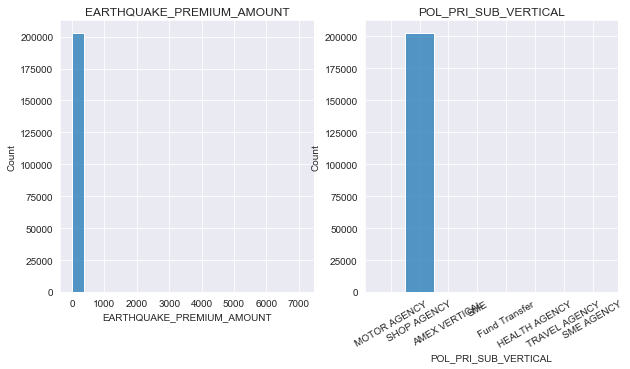

In [7]:
fig, axes = plt.subplots(1, 2, sharex=False,sharey=False, figsize=(10,5))

#fig, axes = plt.subplots(2, 2, sharex=False,sharey=False, figsize=(10,5))

sns.histplot(ax=axes[0], x='EARTHQUAKE_PREMIUM_AMOUNT',data=df_ins1)
#sns.histplot(ax=axes[0, 0],x='EARTHQUAKE_PREMIUM_AMOUNT',data=df_ins1)
plt.xticks(rotation=30)
axes[0].set_title('EARTHQUAKE_PREMIUM_AMOUNT')

sns.histplot(ax=axes[1], x='POL_PRI_SUB_VERTICAL',data=df_ins1)
plt.xticks(rotation=30)
axes[1].set_title('POL_PRI_SUB_VERTICAL')





In [8]:
print(df_ins1.columns)
print(df_ins1.shape)


Index(['INTERMEDIARY_TYPE', 'INTERMEDIARY_CATEGORY', 'IRDA_LICENCE_NUMBER',
       'INTERMEDIARY_ID', 'INTERMEDIARY_NAME', 'LOCATION_NAME',
       'CUSTOMER_NAME', 'IRDA_PRODUCT_CODE', 'PRODUCT_NAME', 'POLICY_NUMBER',
       'POL_NUM_TXT', 'POL_PRIMARY_VERTICAL', 'POL_PRI_SUB_VERTICAL',
       'POL_DEAL_NUM', 'POL_RM_CODE', 'POL_RM_NAME',
       'APPLICABLE_PREMIUM_AMOUNT', 'PREMIUM_FOR_PAYOUTS',
       'COMMISSION_PAYOUTS_PERCENTAGE', 'ACTUAL_COMMISSION_AMOUNT',
       'POLICY_START_DATE', 'POLICY_END_DATE', 'POL_ENDORSEMENT_TYPE',
       'CHILD_INTERMEDIARY_ID', 'CHILD_INTERMEDIARY_NAME', 'BRANCH_NAME',
       'BASIC_PREMIUM_AMOUNT', 'EARTHQUAKE_PREMIUM_AMOUNT',
       'MOTOR_OD_PREMIUM_AMOUNT', 'MOTOR_TP_PREMIUM_AMOUNT',
       'TERRORISM_PREMIUM_AMOUNT', 'WAR_SRCC_PREMIUM_AMT',
       'PREMIUM_AMOUNT_USED', 'SAS_AGENT_ID', 'BUSINESS_TYPE',
       'IRDA_REPORTING_DATE', 'PAYMENT_FLAG', 'GWP', 'SUM_INSURED',
       'GST_REGISTERED', 'TO_LOCATION', 'pol_vehicle_age', 'cust_type',
    

In [9]:
list1=['POL_PRI_SUB_VERTICAL','POL_DEAL_NUM','POL_RM_CODE','POL_RM_NAME','CHILD_INTERMEDIARY_ID',\
      'CHILD_INTERMEDIARY_NAME','SAS_AGENT_ID','BUSINESS_TYPE','TO_LOCATION']
for cols in list1:
    #print(cols)
    if cols in df_ins1.columns:
        #print("iamin")
        df_ins1[cols].fillna(df_ins1[cols].mode()[0],inplace=True)

In [10]:
print(df_ins1.isnull().sum(), (df_ins1.isnull().sum() / df_ins1.shape[0]) * 100)

INTERMEDIARY_TYPE                    0
INTERMEDIARY_CATEGORY                0
IRDA_LICENCE_NUMBER                  0
INTERMEDIARY_ID                      0
INTERMEDIARY_NAME                    0
LOCATION_NAME                        0
CUSTOMER_NAME                        0
IRDA_PRODUCT_CODE                    0
PRODUCT_NAME                         0
POLICY_NUMBER                        0
POL_NUM_TXT                          0
POL_PRIMARY_VERTICAL                 0
POL_PRI_SUB_VERTICAL                 0
POL_DEAL_NUM                         0
POL_RM_CODE                          0
POL_RM_NAME                          0
APPLICABLE_PREMIUM_AMOUNT        50639
PREMIUM_FOR_PAYOUTS                  0
COMMISSION_PAYOUTS_PERCENTAGE        0
ACTUAL_COMMISSION_AMOUNT             0
POLICY_START_DATE                    0
POLICY_END_DATE                      0
POL_ENDORSEMENT_TYPE                 0
CHILD_INTERMEDIARY_ID                0
CHILD_INTERMEDIARY_NAME              0
BRANCH_NAME              

In [11]:
list2=['EARTHQUAKE_PREMIUM_AMOUNT','MOTOR_OD_PREMIUM_AMOUNT','TERRORISM_PREMIUM_AMOUNT','WAR_SRCC_PREMIUM_AMT',\
       'PREMIUM_AMOUNT_USED']

for cols in list2:
    #print(cols)
    if cols in df_ins1.columns:
        print(print(df_ins1[cols].describe()))
        #df_ins1[cols].fillna(df_ins1[cols].mode()[0],inplace=True)



count    202682.000000
mean          0.046703
std          16.642783
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7113.900000
Name: EARTHQUAKE_PREMIUM_AMOUNT, dtype: float64
None
count    202657.000000
mean        305.697958
std        2155.594520
min     -110741.000000
25%         102.000000
50%         276.000000
75%         412.000000
max      666523.000000
Name: MOTOR_OD_PREMIUM_AMOUNT, dtype: float64
None
count    202657.000000
mean          0.199588
std         174.240020
min      -47679.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       47679.000000
Name: TERRORISM_PREMIUM_AMOUNT, dtype: float64
None
count    202657.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: WAR_SRCC_PREMIUM_AMT, dtype: float64
None
count    2.026570e+05
mean     6.112093e+02
std      1.574100e+04
min     -3.034185e+06
25%      2.7

In [12]:
df_ins1['MOTOR_OD_PREMIUM_AMOUNT'].isnull().sum()

25

In [13]:
df_ins2=df_ins1[df_ins1['MOTOR_OD_PREMIUM_AMOUNT'].notnull() == True]

In [14]:
print(df_ins2['MOTOR_OD_PREMIUM_AMOUNT'].sum(axis=0,skipna=True))
#print(df_ins1['MOTOR_OD_PREMIUM_AMOUNT'< 0].sum())
#print(df_ins1['MOTOR_OD_PREMIUM_AMOUNT'].notnull() == True & df_ins1['MOTOR_OD_PREMIUM_AMOUNT'<0].sum())
print(df_ins2['TERRORISM_PREMIUM_AMOUNT'].sum())
print(df_ins2['PREMIUM_AMOUNT_USED'].sum())

61951831.15
40448.0
123865848.49


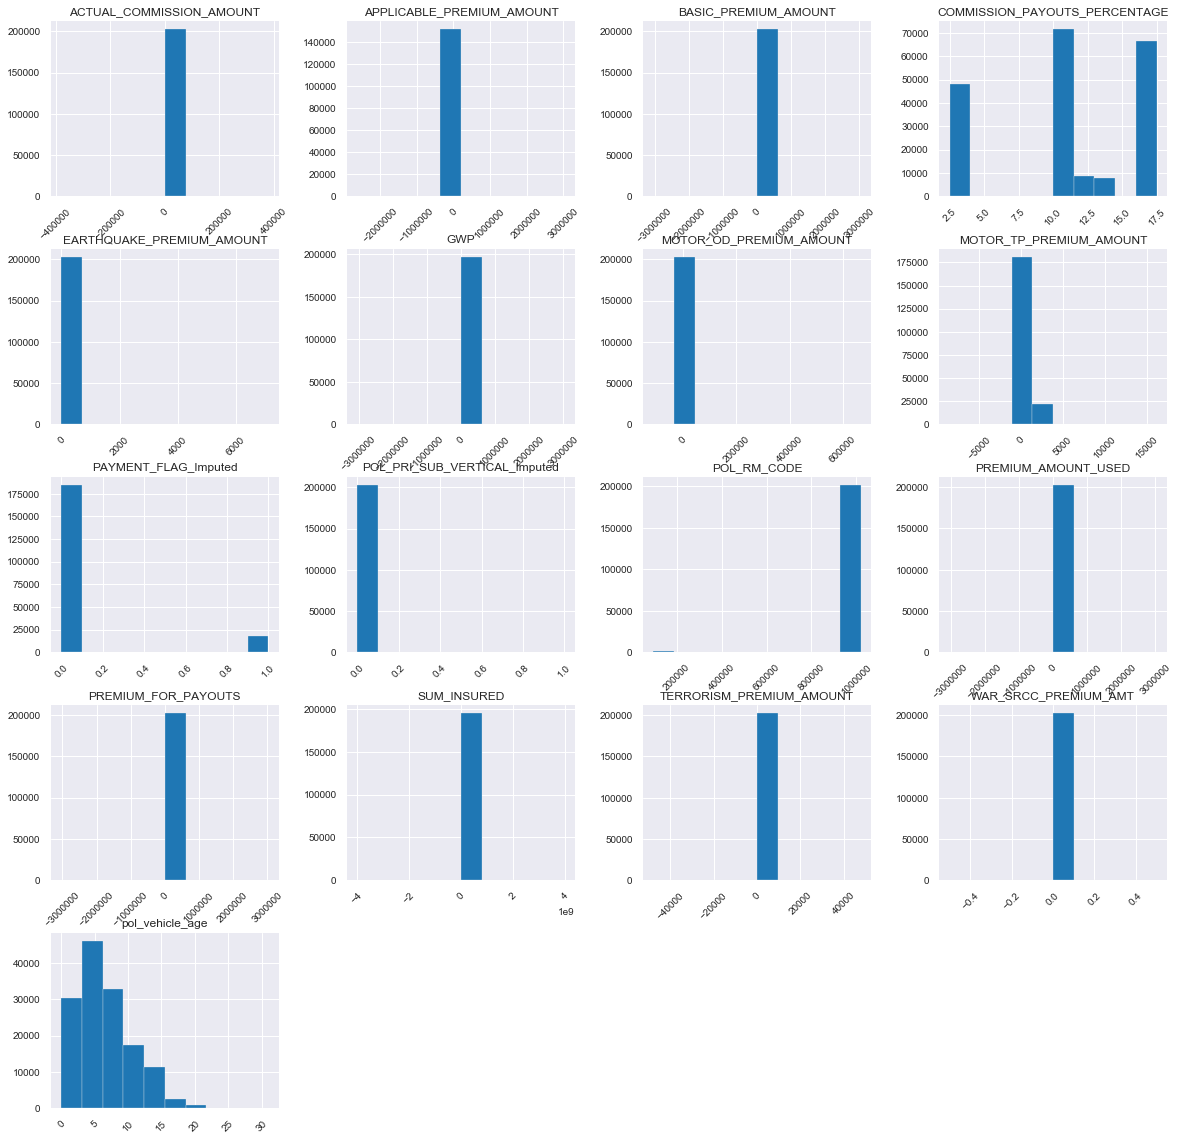

In [15]:
import pandas_profiling
from pandas_profiling import ProfileReport
df_numeric = df_ins2.select_dtypes(include=np.number).columns.tolist()
df_hist = df_ins2[df_numeric].copy()
df_hist.hist(figsize=(20,20), xrot=45)
plt.show()

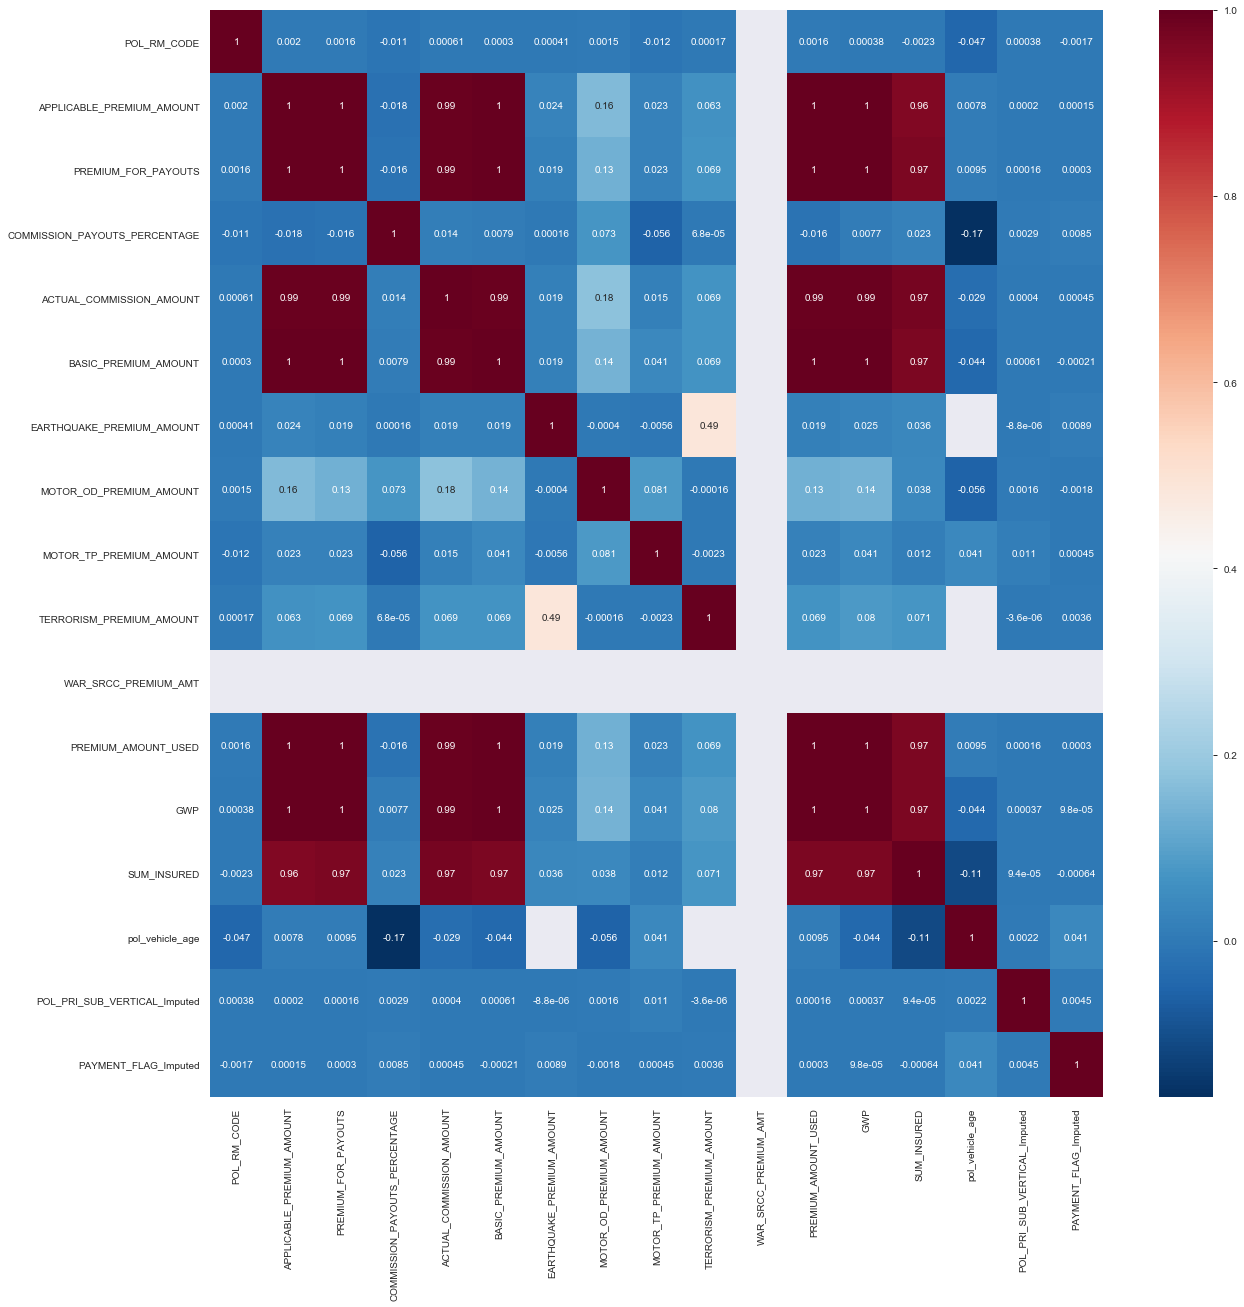

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df_ins2.corr(), cmap='RdBu_r', annot=True)
plt.show()

In [17]:
profile = df_ins2.profile_report(title='EDA using Pandas Profiling')
profile.to_file(output_file="Alert_eda.html")


In [18]:
df_ins2.to_csv("11.csv",index=False)

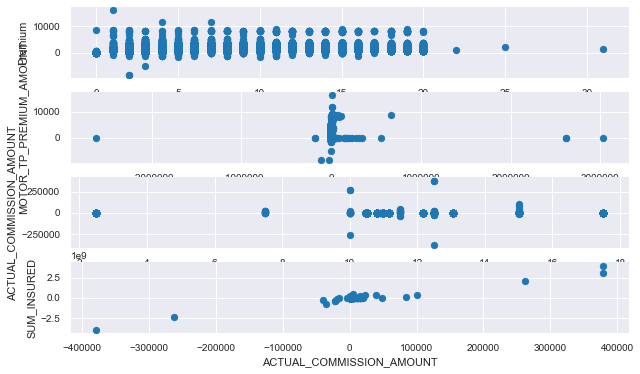

In [19]:
fig, ax = plt.subplots(4, figsize=(10, 6))
ax[0].scatter(x = df_ins2['pol_vehicle_age'], y = df_ins2['MOTOR_TP_PREMIUM_AMOUNT'])
ax[0].set_xlabel("Vehicle age")
ax[0].set_ylabel("Premium")

ax[1].scatter(x = df_ins2['APPLICABLE_PREMIUM_AMOUNT'], y = df_ins2['MOTOR_TP_PREMIUM_AMOUNT'])
ax[1].set_xlabel("APPLICABLE_PREMIUM_AMOUNT")
ax[1].set_ylabel("MOTOR_TP_PREMIUM_AMOUNT")


ax[2].scatter(x = df_ins2['COMMISSION_PAYOUTS_PERCENTAGE'], y = df_ins2['ACTUAL_COMMISSION_AMOUNT'])
ax[2].set_xlabel("COMMISSION_PAYOUTS_PERCENTAGE")
ax[2].set_ylabel("ACTUAL_COMMISSION_AMOUNT")

ax[3].scatter(x = df_ins2['ACTUAL_COMMISSION_AMOUNT'], y = df_ins2['SUM_INSURED'])
ax[3].set_xlabel("ACTUAL_COMMISSION_AMOUNT")
ax[3].set_ylabel("SUM_INSURED")

plt.show()

In [20]:
# Correlated columns 
#### basic premium amount = motor od premium amount + motor tp premium amount 
#### basic premium amount = premium amount used
#### gwp = basic premium amount
#### 'APPLICABLE_PREMIUM_AMOUNT' = 'PREMIUM_FOR_PAYOUTS'


In [21]:
df_ins3=df_ins2.drop(['MOTOR_OD_PREMIUM_AMOUNT','PREMIUM_AMOUNT_USED','GWP','TERRORISM_PREMIUM_AMOUNT',\
                     'WAR_SRCC_PREMIUM_AMT','APPLICABLE_PREMIUM_AMOUNT','PREMIUM_FOR_PAYOUTS','EARTHQUAKE_PREMIUM_AMOUNT'\
                     ],axis=1)

In [22]:
print(df_ins2.shape,df_ins3.shape)

(202657, 47) (202657, 39)


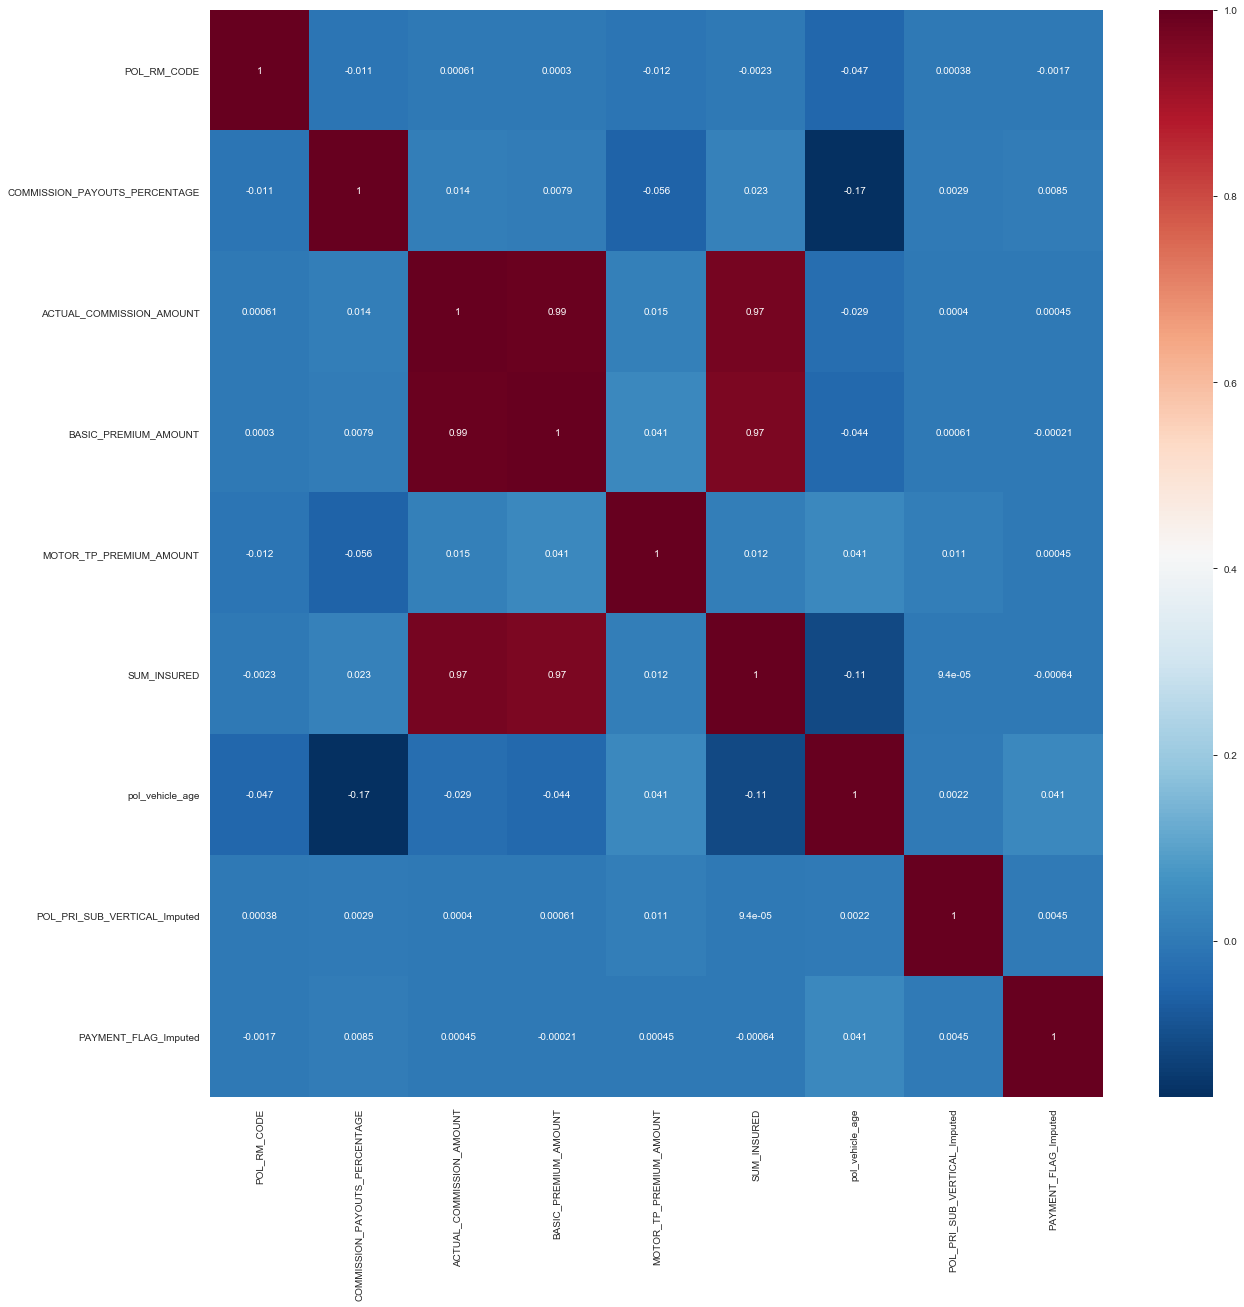

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df_ins3.corr(), cmap='RdBu_r', annot=True)

In [72]:
df_ins3.isnull().sum()

INTERMEDIARY_TYPE                0
INTERMEDIARY_CATEGORY            0
IRDA_LICENCE_NUMBER              0
INTERMEDIARY_ID                  0
INTERMEDIARY_NAME                0
LOCATION_NAME                    0
CUSTOMER_NAME                    0
IRDA_PRODUCT_CODE                0
PRODUCT_NAME                     0
POLICY_NUMBER                    0
POL_NUM_TXT                      0
POL_PRIMARY_VERTICAL             0
POL_PRI_SUB_VERTICAL             0
POL_DEAL_NUM                     0
POL_RM_CODE                      0
POL_RM_NAME                      0
COMMISSION_PAYOUTS_PERCENTAGE    0
ACTUAL_COMMISSION_AMOUNT         0
POLICY_START_DATE                0
POLICY_END_DATE                  0
POL_ENDORSEMENT_TYPE             0
CHILD_INTERMEDIARY_ID            0
CHILD_INTERMEDIARY_NAME          0
BRANCH_NAME                      0
BASIC_PREMIUM_AMOUNT             0
MOTOR_TP_PREMIUM_AMOUNT          0
SAS_AGENT_ID                     0
BUSINESS_TYPE                    0
IRDA_REPORTING_DATE 

In [56]:
df_ins3.dtypes

INTERMEDIARY_TYPE                 object
INTERMEDIARY_CATEGORY             object
IRDA_LICENCE_NUMBER               object
INTERMEDIARY_ID                   object
INTERMEDIARY_NAME                 object
LOCATION_NAME                     object
CUSTOMER_NAME                     object
IRDA_PRODUCT_CODE                 object
PRODUCT_NAME                      object
POLICY_NUMBER                     object
POL_NUM_TXT                       object
POL_PRIMARY_VERTICAL              object
POL_PRI_SUB_VERTICAL              object
POL_DEAL_NUM                      object
POL_RM_CODE                      float64
POL_RM_NAME                       object
COMMISSION_PAYOUTS_PERCENTAGE    float64
ACTUAL_COMMISSION_AMOUNT         float64
POLICY_START_DATE                 object
POLICY_END_DATE                   object
POL_ENDORSEMENT_TYPE              object
CHILD_INTERMEDIARY_ID             object
CHILD_INTERMEDIARY_NAME           object
BRANCH_NAME                       object
BASIC_PREMIUM_AM

In [48]:
df_ins3['Cycal Month']=df_ins3['Filename'].apply(lambda x: (((x.split(".")[-2].split(" ")[-2]))+\
                                                               ((x.split(".")[-2].split(" ")[-1])[-2:]))\
                       if pd.isnull(x) else x)

In [51]:
df_ins3['cust_type'+'_Imputed'] = np.where(df_ins3['cust_type'].isnull(),1,0)
print(df_ins3['cust_type'].value_counts(dropna=False))
df_ins3['cust_type'].fillna(df_ins3['cust_type'].mode()[0],inplace=True) 

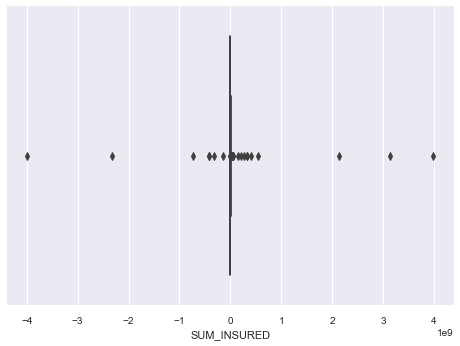

In [60]:
sns.boxplot(x=df_ins3['SUM_INSURED'])

In [63]:

df_ins3['SUM_INSURED'].value_counts(dropna=False)

0.000              44944
nan                 7369
1528207.000         3350
1517000.000         2318
1530227.000         2156
1519094.000         2060
1530000.000         1836
1544703.000         1822
1536272.000         1753
1520000.000         1540
1521180.000         1368
1532500.000         1312
1529079.000         1062
1537274.000         1052
1523500.000         1041
1526000.000          945
1525000.000          943
1518704.000          938
1542000.000          903
1547583.000          826
17000.000            823
1538317.000          794
1536000.000          771
20000.000            768
1526753.000          767
1548000.000          721
1551932.000          699
32500.000            683
28207.000            679
1539759.000          668
1537500.000          634
1728207.000          622
1523391.000          618
30000.000            611
19094.000            592
1535750.000          582
1541163.000          578
1518526.000          547
1521983.000          490
1518300.000          488


In [65]:
df_ins3['SUM_INSURED'+'_Imputed'] = np.where(df_ins3['SUM_INSURED'].isnull(),1,0)
df_ins3['pol_vehicle_age'+'_Imputed']=np.where(df_ins3['pol_vehicle_age'].isnull(),1,0)

In [69]:
df_ins3=df_ins3.sort_values(by=['BASIC_PREMIUM_AMOUNT'])

In [70]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5,weights='distance')

In [71]:
list1=['SUM_INSURED','pol_vehicle_age']
for val in list1:
 df_ins3[val] = np.round(imputer.fit_transform(df_ins3[val].values.reshape(-1, 1)))


In [236]:
df_ins4=df_ins3.drop(['INTERMEDIARY_TYPE','INTERMEDIARY_CATEGORY','IRDA_LICENCE_NUMBER','INTERMEDIARY_ID','INTERMEDIARY_NAME',\
                     'LOCATION_NAME','POLICY_NUMBER','POL_NUM_TXT','POL_DEAL_NUM','SAS_AGENT_ID','POLICY_START_DATE',\
                      'POLICY_END_DATE','IRDA_REPORTING_DATE','Filename','Cycal Month','CUSTOMER_NAME','POL_RM_CODE','POL_RM_NAME',\
                     'CHILD_INTERMEDIARY_ID','CHILD_INTERMEDIARY_NAME'],axis=1)

In [79]:
df_ins4.to_csv("clustering_ip.csv",index=True)

# CLUSTERING

In [99]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn import preprocessing

In [237]:
categorical_columns=[]
numerical_columns=[]
for i in range(0,df_ins4.shape[1]):
    if df_ins4.dtypes[i]=='object':
        categorical_columns.append(df_ins4.columns[i])
    else:    
        numerical_columns.append(df_ins4.columns[i])

print(categorical_columns)
print(numerical_columns)

['IRDA_PRODUCT_CODE', 'PRODUCT_NAME', 'POL_PRIMARY_VERTICAL', 'POL_PRI_SUB_VERTICAL', 'POL_ENDORSEMENT_TYPE', 'BRANCH_NAME', 'BUSINESS_TYPE', 'PAYMENT_FLAG', 'GST_REGISTERED', 'TO_LOCATION', 'cust_type']
['COMMISSION_PAYOUTS_PERCENTAGE', 'ACTUAL_COMMISSION_AMOUNT', 'BASIC_PREMIUM_AMOUNT', 'MOTOR_TP_PREMIUM_AMOUNT', 'SUM_INSURED', 'pol_vehicle_age', 'POL_PRI_SUB_VERTICAL_Imputed', 'PAYMENT_FLAG_Imputed', 'cust_type_Imputed', 'SUM_INSURED_Imputed', 'pol_vehicle_age_Imputed']


In [238]:
df_ins5=pd.DataFrame()
df_ins5=df_ins4.copy(deep=True)
df_ins5.drop(numerical_columns,axis=1,inplace=True)
print(df_ins4.shape,df_ins5.shape)

(202657, 22) (202657, 11)


In [239]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
le = preprocessing.LabelEncoder()

df_ins4[categorical_columns] = df_ins4[categorical_columns].apply(le.fit_transform)
#for cols in categorical_columns:
#   df_ins4[cols] = le.fit_transform(df_ins4[cols])

#for cols in categorical_columns:
#   df_ins4[cols] = le.inverse_transform(df_ins4[cols])
#print(df_ins4.head())

In [241]:
kmeans = KMeans(init="random",n_clusters=11,n_init=10,max_iter=300,random_state=42)

In [242]:
kmeans.fit(df_ins4)

KMeans(init='random', n_clusters=11, random_state=42)

In [243]:
kmeans_kwargs ={"init": "random",   "n_init": 10,  "max_iter": 300, "random_state": 42 }
sse = []
for k in range(1, 11):
       kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
       kmeans.fit(df_ins4)
       sse.append(kmeans.inertia_)

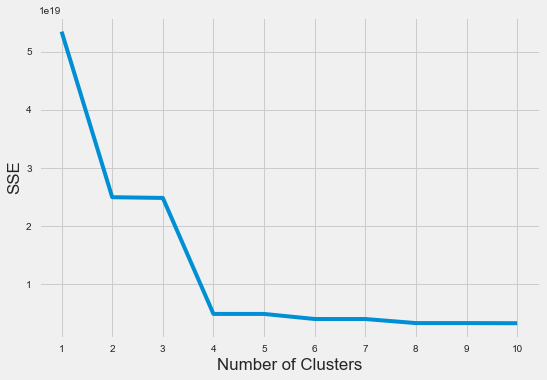

In [244]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [245]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [246]:
# selecting 4
kmeans1 = KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)

In [247]:
kmeans1.fit(df_ins4)

KMeans(init='random', n_clusters=4, random_state=42)

In [248]:
unique, counts = np.unique(kmeans1.labels_, return_counts=True)
print(np.asarray((unique,counts)).T)

[[     0  80233]
 [     1 122419]
 [     2      2]
 [     3      3]]


In [249]:
df_ins4['cluster_no']=kmeans1.labels_

In [251]:
df_ins6=pd.DataFrame()
df_ins6=pd.concat([df_ins4.drop(categorical_columns,axis=1),df_ins5],axis=1)
print(df_ins4.shape,df_ins5.shape,df_ins6.shape)

(202657, 23) (202657, 11) (202657, 23)


In [253]:
df_ins6.to_csv("clusters.csv",index=True)